In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import classyNN as cnn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Start by loading the data. This should be exported in py-module

In [3]:
fname_train_data = 'GstLAL/train_NS.csv'
fname_test_data  = 'GstLAL/test_NS.csv'
train_datasets   = cnn.extract_data(fname_train_data, skip_header=True)
test_datasets    = cnn.extract_data(fname_test_data, skip_header=True)
out_intervals = [[1,120], [0.8, 82], [-1, 1], [-1,1], [0.85, 75], [1, 100], [1.45,9], [0.1, 0.5]] 
out_intervals = np.array(out_intervals)
# for the LSO, 1.45 corresponds to a=0.99 in Kerr

In [4]:
# ID                0
# m1_inj            1
# m2_inj            2
# chi1_inj          3
# chi2_inj          4
# mc_inj            5
# q_inj             6
# R_isco_inj        7
# Compactness_inj   8
# m1_rec            9
# m2_rec           10
# chi1_rec         11
# chi2_rec         12
# mc_rec           13
# frac_mc_err      14
# q_rec            15
# R_isco_rec       16
# Compactness_rec  17
# snr              18
# s                19

def return_inj_rec(X, features='mass&spin'):
    """ Maybe a little bit pedantic, 
    but I prefer to keep this function as
    readable as possible 
    """
    if features=='all':
        m1_inj          = X[:, 1]
        m2_inj          = X[:, 2]
        chi1_inj        = X[:, 3]
        chi2_inj        = X[:, 4]
        mc_inj          = X[:, 5]
        q_inj           = X[:, 6]
        R_isco_inj      = X[:, 7]
        Compactness_inj = X[:, 8]
        m1_rec          = X[:, 9]
        m2_rec          = X[:,10]
        chi1_rec        = X[:,11]
        chi2_rec        = X[:,12]
        mc_rec          = X[:,13]
        q_rec           = X[:,15]
        R_isco_rec      = X[:,16]
        Compactness_rec = X[:,17]
        inj = np.column_stack((m1_inj,m2_inj,chi1_inj,chi2_inj,mc_inj,q_inj,R_isco_inj,Compactness_inj))
        rec = np.column_stack((m1_rec,m2_rec,chi1_rec,chi2_rec,mc_rec,q_rec,R_isco_rec,Compactness_rec))
        names = [r'$m_1$', r'$m_2$', r'$\chi_1$', r'$\chi_2$', r'${\cal M}_c$', r'$q$', \
                 r'$R_{\rm isco}$', r'$C$']
    elif features=='mass&spin':
        m1_inj          = X[:, 1]
        chi1_inj        = X[:, 3]
        chi2_inj        = X[:, 4]
        mc_inj          = X[:, 5]
        m1_rec          = X[:, 9]
        chi1_rec        = X[:,11]
        chi2_rec        = X[:,12]
        mc_rec          = X[:,13]
        inj = np.column_stack((m1_inj,chi1_inj,chi2_inj,mc_inj))
        rec = np.column_stack((m1_rec,chi1_rec,chi2_rec,mc_rec))
        names = [r'$m_1$', r'$\chi_1$', r'$\chi_2$', r'${\cal M}_c$']
    elif features=='spin':
        chi1_inj        = X[:, 3]
        chi2_inj        = X[:, 4]
        chi1_rec        = X[:,11]
        chi2_rec        = X[:,12]
        inj = np.column_stack((chi1_inj,chi2_inj))
        rec = np.column_stack((chi1_rec,chi2_rec))
        names = [r'$\chi_1$', r'$\chi_2$']
    ID  = X[:,0]
    snr = X[:,18]
    
    out          = {}
    out['inj']   = inj
    out['rec']   = rec
    out['SNR']   = snr
    out['names'] = names
    out['ID']    = ID
    return out

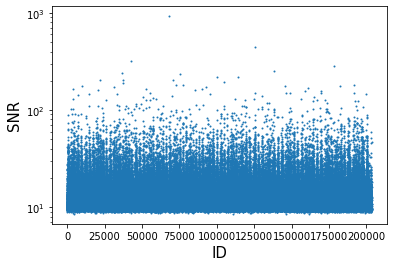

--------------------------------------------------  train  -------------------------------------------------


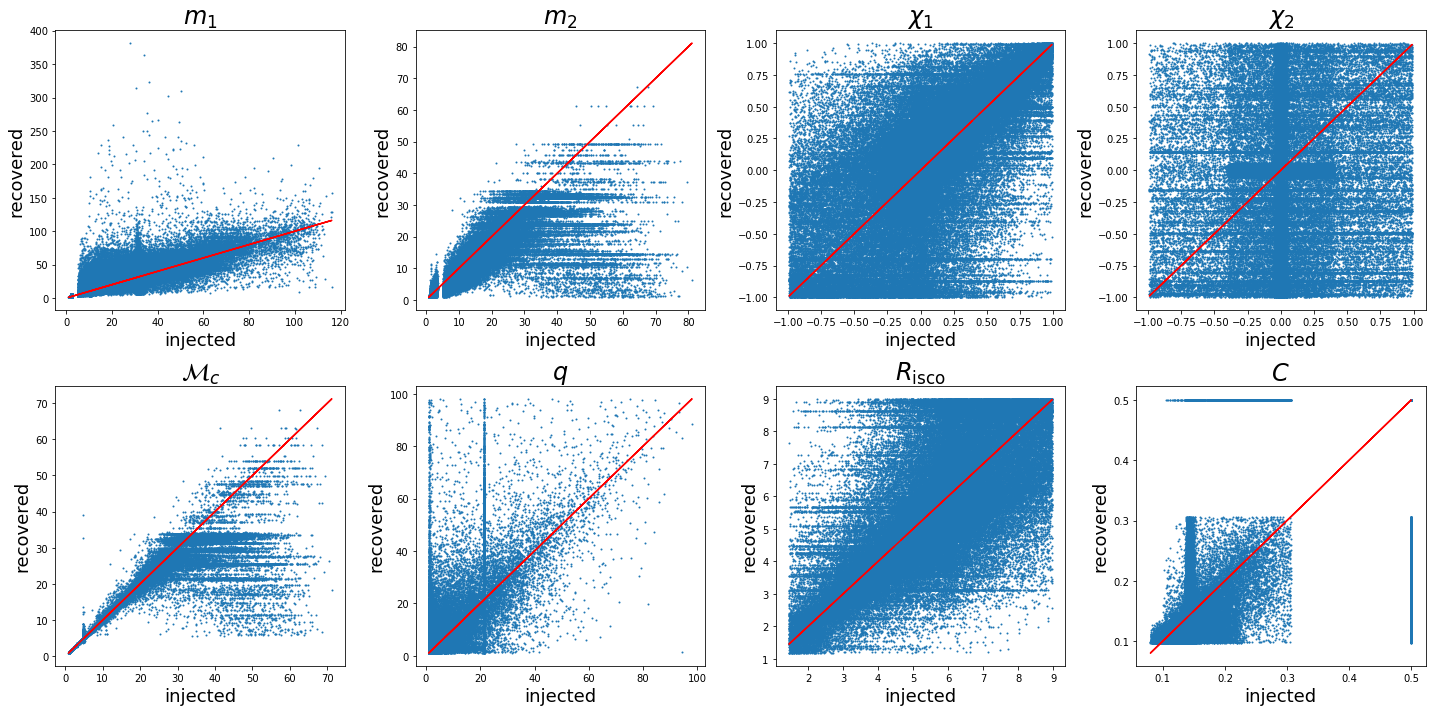

--------------------------------------------------  test  --------------------------------------------------


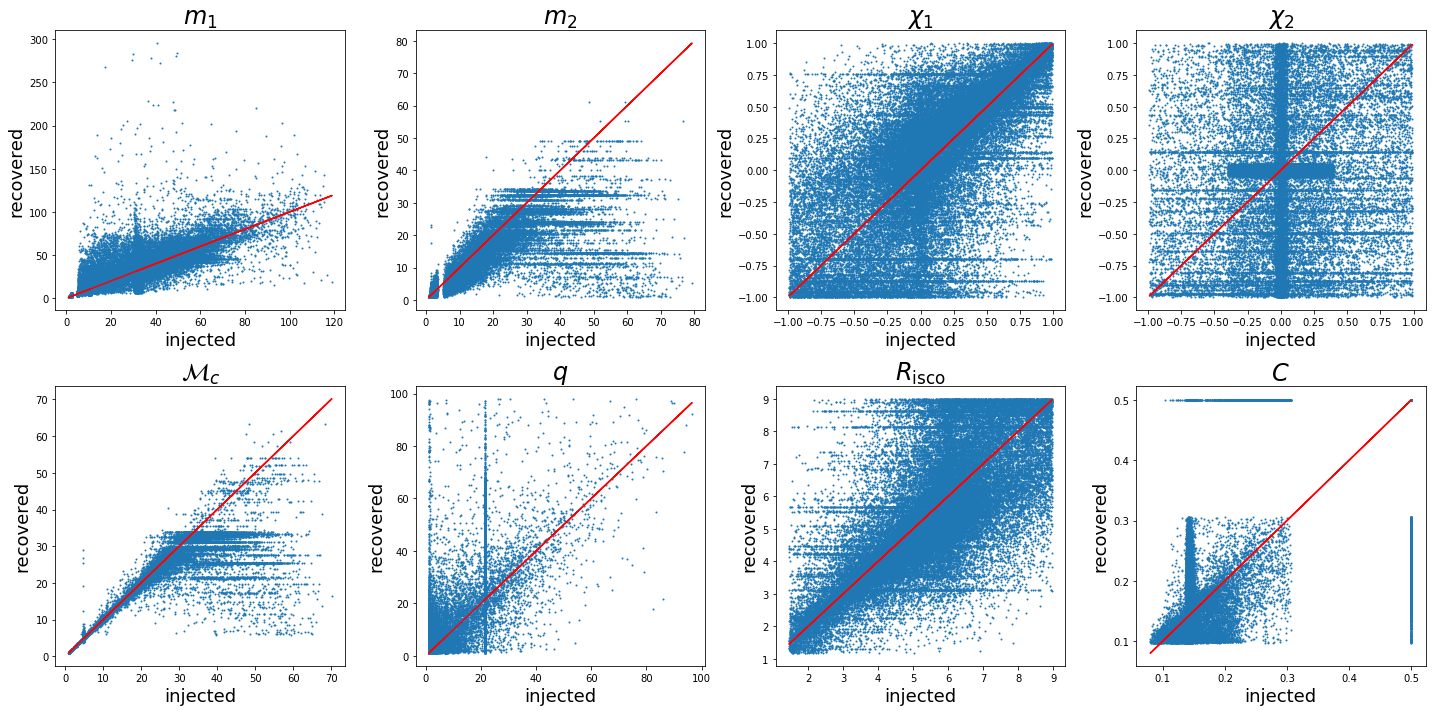

In [5]:
train_data_split = return_inj_rec(train_datasets, features='all')
train_inj = train_data_split['inj']
train_rec = train_data_split['rec']
train_snr = train_data_split['SNR']

test_data_split = return_inj_rec(test_datasets, features='all')
test_inj = test_data_split['inj']
test_rec = test_data_split['rec']
test_snr = test_data_split['SNR']

names     = train_data_split['names']
nfeatures = len(train_inj[0,:])
ntrain    = len(train_inj[:,0])
ntest     = len( test_inj[:,0])

plt.figure
plt.scatter(train_data_split['ID'], train_snr, s=1)
plt.yscale('log')
plt.ylabel('SNR', fontsize=15)
plt.xlabel('ID', fontsize=15)
plt.show()

print('-'*50,' train ','-'*49)
plt.figure(figsize=(20,10))
for i in range(nfeatures):
    ax = plt.subplot(241+i)
    ax.scatter(train_inj[:,i], train_rec[:,i],s=1)
    ax.plot(train_inj[:,i], train_inj[:,i], 'r')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel('injected', fontsize=18)
    ax.set_ylabel('recovered', fontsize=18)
plt.tight_layout()
plt.show()
print('-'*50,' test ','-'*50)
plt.figure(figsize=(20,10))
for i in range(nfeatures):
    ax = plt.subplot(241+i)
    ax.scatter(test_inj[:,i], test_rec[:,i],s=1)
    ax.plot(test_inj[:,i], test_inj[:,i], 'r')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel('injected', fontsize=18)
    ax.set_ylabel('recovered', fontsize=18)
plt.tight_layout()
plt.show()

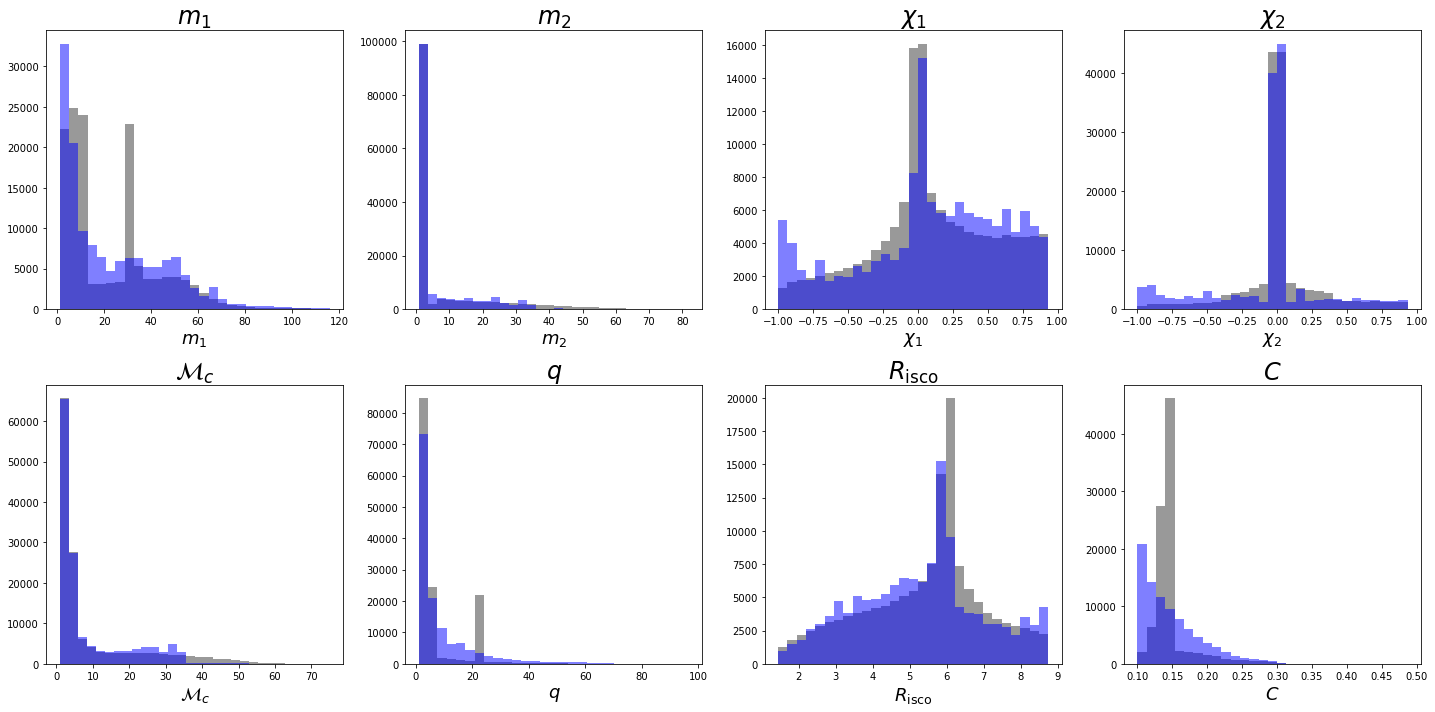

In [6]:
plt.figure(figsize=(20,10))
nbins = 30
for i in range(nfeatures):
    ax = plt.subplot(241+i)
    fmin  = out_intervals[i][0]
    fmax  = out_intervals[i][1]
    fstep = (fmax-fmin)/nbins
    ax.hist(train_inj[:,i], bins=np.arange(fmin, fmax, fstep), alpha=1,  color=[0.6,0.6,0.6], label='inj')
    ax.hist(train_rec[:,i], bins=np.arange(fmin, fmax, fstep), alpha=0.5,  color=[0,0,1], label='inj')
    ax.set_title(names[i], fontsize=24)
    ax.set_xlabel(names[i], fontsize=18)
plt.tight_layout()
plt.show()

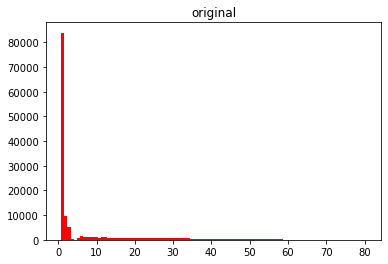

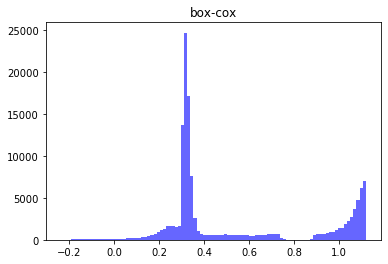

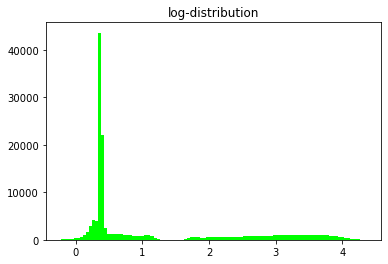

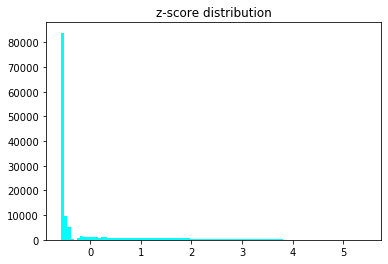

In [7]:
nbins = 100

# let's see an example on Mc, rec
idx  = 1
x    = train_inj[:,idx]
fmin = min(x)
fmax = max(x)
fstep = (fmax-fmin)/nbins

# original distribution
plt.figure
plt.hist(x, bins=np.arange(fmin, fmax, fstep), alpha=1, color=[1,0,0])
plt.title('original')
plt.show()

# box-cox distribution
y, lmbda = stats.boxcox(x)
maxy = max(y)
miny = min(y)
plt.figure
plt.hist(y, bins=np.arange(miny, maxy, (maxy-miny)/nbins), alpha=0.6, color=[0,0,1])
plt.title('box-cox')
plt.show()

# log-distribution
logx      = np.log(x)
fmin_log  = min(logx)
fmax_log  = max(logx)
fstep_log = (fmax_log-fmin_log)/nbins
plt.figure
plt.hist(logx, bins=np.arange(fmin_log, fmax_log, fstep_log), alpha=1, color=[0,1,0])
plt.title('log-distribution')
plt.show()

# z-score distribution
z = stats.zscore(x)
fmin_z  = min(z)
fmax_z  = max(z)
fstep_z = (fmax_z-fmin_z)/nbins
plt.figure
plt.hist(z, bins=np.arange(fmin_z, fmax_z, fstep_z), alpha=1, color=[0,1,1])
plt.title('z-score distribution')
plt.show()

In [8]:
NN = cnn.RegressionNN(nfeatures=nfeatures, hlayers_sizes=(10,), out_intervals=out_intervals, seed=None)

In [9]:
NN.load_train_dataset(xtrain_data=train_rec, ytrain_data=train_inj, verbose=True, boxcox=False)
NN.training(epochs=30, batch_size=128, verbose=True)

Epoch 1/30
1094/1094 [==============================] - 2s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914 - R2metric: 0.7400
Epoch 2/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0502 - mean_squared_error: 0.0502 - R2metric: 0.8570
Epoch 3/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0469 - mean_squared_error: 0.0469 - R2metric: 0.8665
Epoch 4/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - R2metric: 0.8704
Epoch 5/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0441 - R2metric: 0.8745
Epoch 6/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0424 - mean_squared_error: 0.0424 - R2metric: 0.8794
Epoch 7/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0416 - mean_squared_error: 0.0416 - R2metric: 0.8816
Epoch 8/30
1094/1094 [==============================] - 1s 1ms/step - loss: 0.0412 

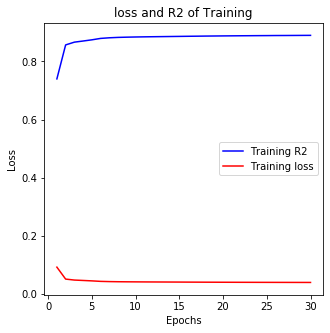

In [10]:
NN.plot_history()

In [11]:
NN.load_test_dataset(xtest_data=test_rec, ytest_data=test_inj, verbose=True)

In [12]:
print('-'*25, 'R2 for recovery', '-'*25)
def R2_numpy(y_true, y_pred):
            SS_res = np.sum((y_true - y_pred )**2)
            SS_tot = np.sum((y_true - np.mean(y_true))**2)
            return 1-SS_res/SS_tot        
for i in range(nfeatures):
    R2 = R2_numpy(test_inj[:,i], test_rec[:,i])  
    print('R2[{:2d}]         : {:.5f}'.format(i,R2))

print('-'*25, 'R2 for prediction', '-'*23)
NN.print_metrics()

------------------------- R2 for recovery -------------------------
R2[ 0]         : 0.61870
R2[ 1]         : 0.66875
R2[ 2]         : 0.28814
R2[ 3]         : -1.56280
R2[ 4]         : 0.84706
R2[ 5]         : 0.03416
R2[ 6]         : 0.38333
R2[ 7]         : 0.81511
------------------------- R2 for prediction -----------------------
Final R2 mean  : 0.72131
R2[ 0]         : 0.83684
R2[ 1]         : 0.91124
R2[ 2]         : 0.66650
R2[ 3]         : 0.08972
R2[ 4]         : 0.94737
R2[ 5]         : 0.71391
R2[ 6]         : 0.69155
R2[ 7]         : 0.91335


## Histograms

-------------------------------------------------- m1 --------------------------------------------------
prediction below fmin=-60.00: 18
recovery   below fmin=-60.00: 219
prediction above fmax= 60.00: 28
recovery   above fmax= 60.00: 22


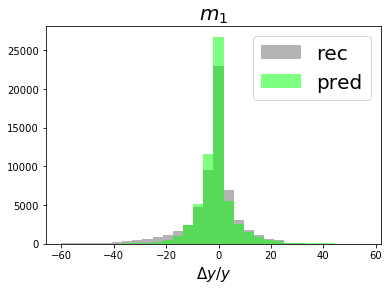

-------------------------------------------------- m2 --------------------------------------------------
prediction below fmin=-20.00: 113
recovery   below fmin=-20.00: 4
prediction above fmax= 20.00: 215
recovery   above fmax= 20.00: 2120


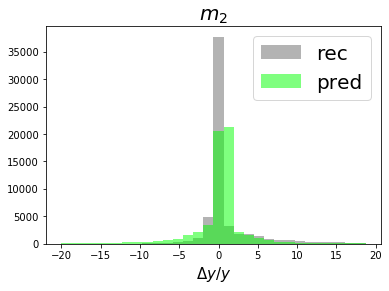

-------------------------------------------------- Chi1 --------------------------------------------------
prediction below fmin= -1.70: 1
recovery   below fmin= -1.70: 5
prediction above fmax=  1.70: 0
recovery   above fmax=  1.70: 28


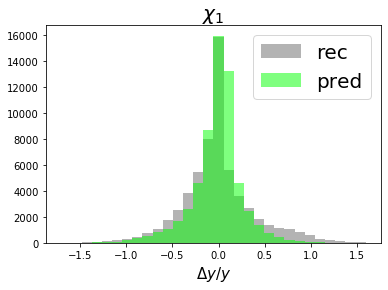

-------------------------------------------------- Chi2 --------------------------------------------------
prediction below fmin= -1.70: 0
recovery   below fmin= -1.70: 43
prediction above fmax=  1.70: 0
recovery   above fmax=  1.70: 162


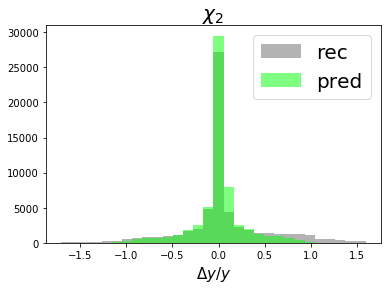

-------------------------------------------------- Mc --------------------------------------------------
prediction below fmin= -3.00: 4812
recovery   below fmin= -3.00: 425
prediction above fmax=  3.00: 2348
recovery   above fmax=  3.00: 5321


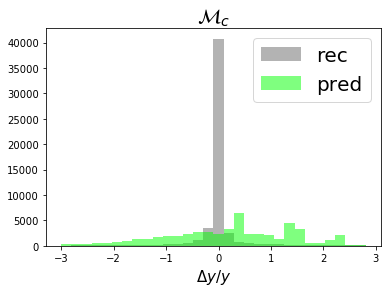

-------------------------------------------------- q --------------------------------------------------
prediction below fmin=-20.00: 232
recovery   below fmin=-20.00: 2020
prediction above fmax= 20.00: 339
recovery   above fmax= 20.00: 194


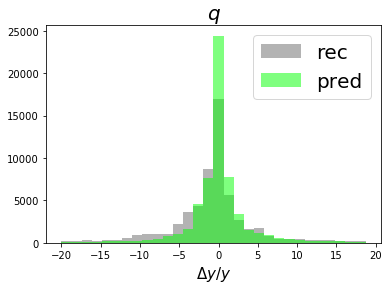

-------------------------------------------------- Risco --------------------------------------------------
prediction below fmin= -6.00: 0
recovery   below fmin= -6.00: 26
prediction above fmax=  6.00: 0
recovery   above fmax=  6.00: 1


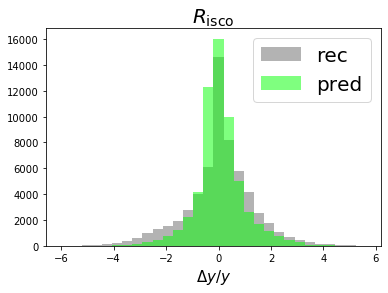

-------------------------------------------------- Comp --------------------------------------------------
prediction below fmin= -0.37: 0
recovery   below fmin= -0.37: 10
prediction above fmax=  0.37: 10
recovery   above fmax=  0.37: 86


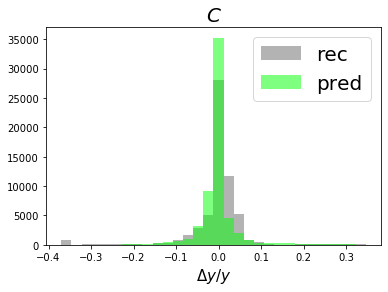

In [13]:
print('-'*50, 'm1', '-'*50)
NN.plot_err_histogram(feature_idx=0, fmin=-60, fmax=60, verbose=True, name=names[0])

print('-'*50, 'm2', '-'*50)
NN.plot_err_histogram(feature_idx=1, fmin=-20, fmax=20, verbose=True, name=names[1])

print('-'*50, 'Chi1', '-'*50)
NN.plot_err_histogram(feature_idx=2, fmin=-1.7, fmax=1.7, verbose=True, name=names[2])

print('-'*50, 'Chi2', '-'*50)
NN.plot_err_histogram(feature_idx=3, fmin=-1.7, fmax=1.7, verbose=True, name=names[3])

print('-'*50, 'Mc', '-'*50)
NN.plot_err_histogram(feature_idx=4, fmin=-3, fmax=3, verbose=True, name=names[4])

print('-'*50, 'q', '-'*50)
NN.plot_err_histogram(feature_idx=5, fmin=-20, fmax=20, verbose=True, name=names[5])

print('-'*50, 'Risco', '-'*50)
NN.plot_err_histogram(feature_idx=6, fmin=-6, fmax=6, verbose=True, name=names[6])

print('-'*50, 'Comp', '-'*50)
NN.plot_err_histogram(feature_idx=7, fmin=-0.37, fmax=0.37, verbose=True, name=names[7])

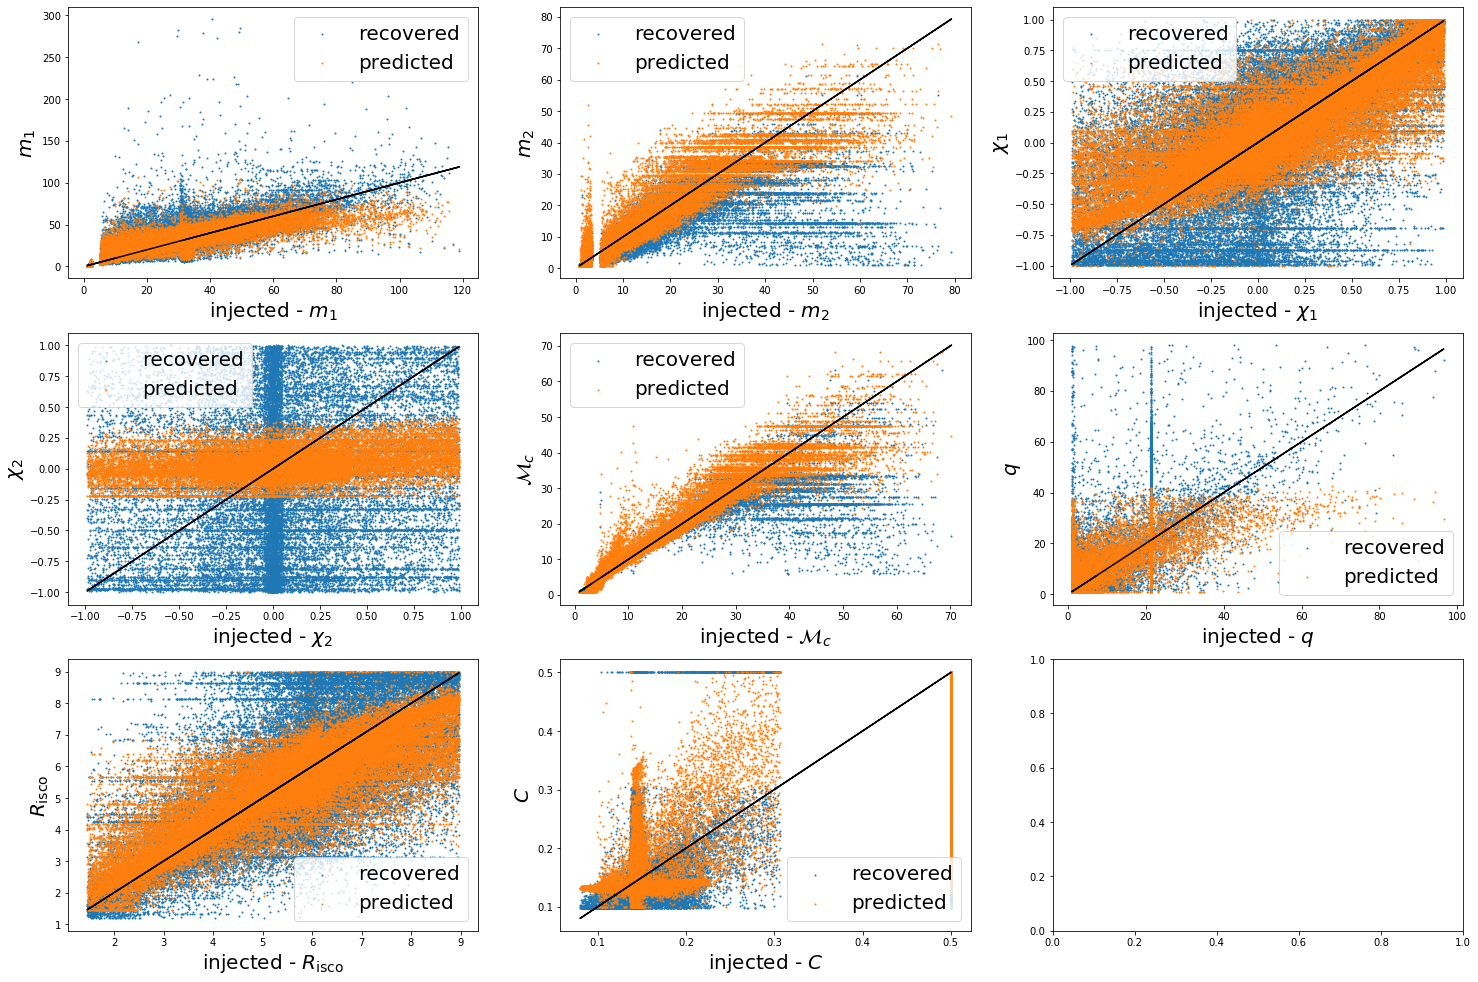

In [14]:
import sys
sys.path.insert(0, '/home/simone/repos/IPAM2021_ML/utils')
import fancyplots as fp
prediction = NN.compute_prediction(NN.xtest) # normalized prediction
fp.checkRegressionPlot(NN.xtest, NN.ytest, prediction, names, scaler_y=NN.scaler_y, scaler_x=NN.scaler_x)

In [15]:
"""
# checks on Linear+Box-Cox scaler
X  = train_inj
Ax = np.reshape(out_intervals[:,0], (nfeatures,1))
Bx = np.reshape(out_intervals[:,1], (nfeatures,1))
scaler = cnn.CustomScaler(Ax, Bx, -1, 1, boxcox=True)
Y  = scaler.transform(X)
Xc = scaler.inverse_transform(Y)

nbins = 31

for i in range(nfeatures):
    y = Y[:,i]
    fmin = min(y)
    fmax = max(y)
    fstep = (fmax-fmin)/nbins
    plt.figure
    plt.hist(y, bins=np.arange(fmin, fmax, fstep), alpha=1, color=[0,1,1])
    plt.title(names[i])
    plt.show()

for i in range(nfeatures):
    nans = np.isnan(Y[:,i])
    sum_nans = sum(nans)
    print(sum_nans)
""";